# Dot Image Pipeline

The input image is expected to be a portrait that the main content is cropped out of the canvas so that the background is blank.

## Prerequisites

In [1]:
from PIL import Image, ImageDraw
import numpy as np
import random
from IPython.display import display

## Functions

In [14]:
def dot_image(image_path, dot_size, gap, background_color_1="#b3b3b3", background_color_2="#cccccc"):

    # CONFIGURATION
    cell_size = dot_size + gap  # Grid cell size
    color1 = background_color_1
    color2 = background_color_2
    # bg_color = "#ffffff"        # Background canvas color

    # Load Transparent Portrait Image
    portrait = Image.open(image_path).convert("RGBA")
    width, height = portrait.size

    # Determine Grid Size
    grid_w = width // cell_size
    grid_h = height // cell_size
    canvas_size = (grid_w * cell_size, grid_h * cell_size)

    # Resize portrait for dot sampling
    resized = portrait.resize((grid_w, grid_h), Image.Resampling.LANCZOS)
    pixels = np.array(resized)

    # === 1. Generate Dotted Portrait === #
    head_img = Image.new("RGBA", canvas_size, (0, 0, 0, 0))
    draw_head = ImageDraw.Draw(head_img)

    for y in range(grid_h):
        for x in range(grid_w):
            r, g, b, a = pixels[y, x]
            if a > 128:  # Only draw where alpha is opaque
                cx = x * cell_size + cell_size // 2
                cy = y * cell_size + cell_size // 2
                draw_head.ellipse(
                    (cx - dot_size // 2, cy - dot_size // 2, cx + dot_size // 2, cy + dot_size // 2),
                    fill=(r, g, b, 255)
                )

    # === 2. Generate Background (dots + sticks) === #
    bg_img = Image.new("RGBA", canvas_size, (0, 0, 0, 0))
    draw_bg = ImageDraw.Draw(bg_img)
    occupied = np.zeros((grid_h, grid_w), dtype=bool)


    stick_lengths = [
        (2, 2 * dot_size + gap),
        (4, 4 * dot_size + 2 * gap)
    ]

    for y in range(grid_h):
        for x in range(grid_w):
            if occupied[y, x]:
                continue

            cx = x * cell_size + cell_size // 2
            cy = y * cell_size + cell_size // 2
            color = color1 if random.random() > 0.5 else color2

            if random.random() < 0.1:
                # Try to place a stick of random length
                length_cells, stick_height = random.choice(stick_lengths)
                if y + length_cells - 1 < grid_h and not any(occupied[y:y + length_cells, x]):
                    cy_top = y * cell_size + cell_size // 2
                    cy_bottom = (y + length_cells - 1) * cell_size + cell_size // 2
                    cy_mid = (cy_top + cy_bottom) / 2
                    draw_bg.rounded_rectangle(
                        (cx - dot_size / 2, cy_mid - stick_height / 2, cx + dot_size / 2, cy_mid + stick_height / 2),
                        radius=dot_size / 2,
                        fill=color
                    )
                    for i in range(length_cells):
                        occupied[y + i, x] = True
                    continue

            # Otherwise draw a dot
            if random.random() > 0.6:
                draw_bg.ellipse(
                    (cx - dot_size / 2, cy - dot_size / 2, cx + dot_size / 2, cy + dot_size / 2),
                    fill=color
                )
            occupied[y, x] = True

    # === 3. Combine Original Portrait onto Background === #
    portrait_resized = portrait.resize(canvas_size, Image.Resampling.LANCZOS)
    combined_img = Image.alpha_composite(bg_img, portrait_resized)

    return head_img, combined_img

In [10]:
def display_images(head_img, combined_img):
    print("\n🖼️ Displaying images...")
    display(head_img)
    display(combined_img)

In [11]:
def save_images(head_path, combined_path):
    head_img.save(head_path)
    combined_img.save(combined_path)
    print("✅ Output Saved:")
    print("• Dotted Portrait:", head_path)
    print("• Combined Image:", combined_path)

## Process

In [15]:
portrait_path = "/content/drive/MyDrive/Image Processing/cat.png"

head_img, combined_img = dot_image(portrait_path, dot_size=40, gap=10)


🖼️ Displaying images...


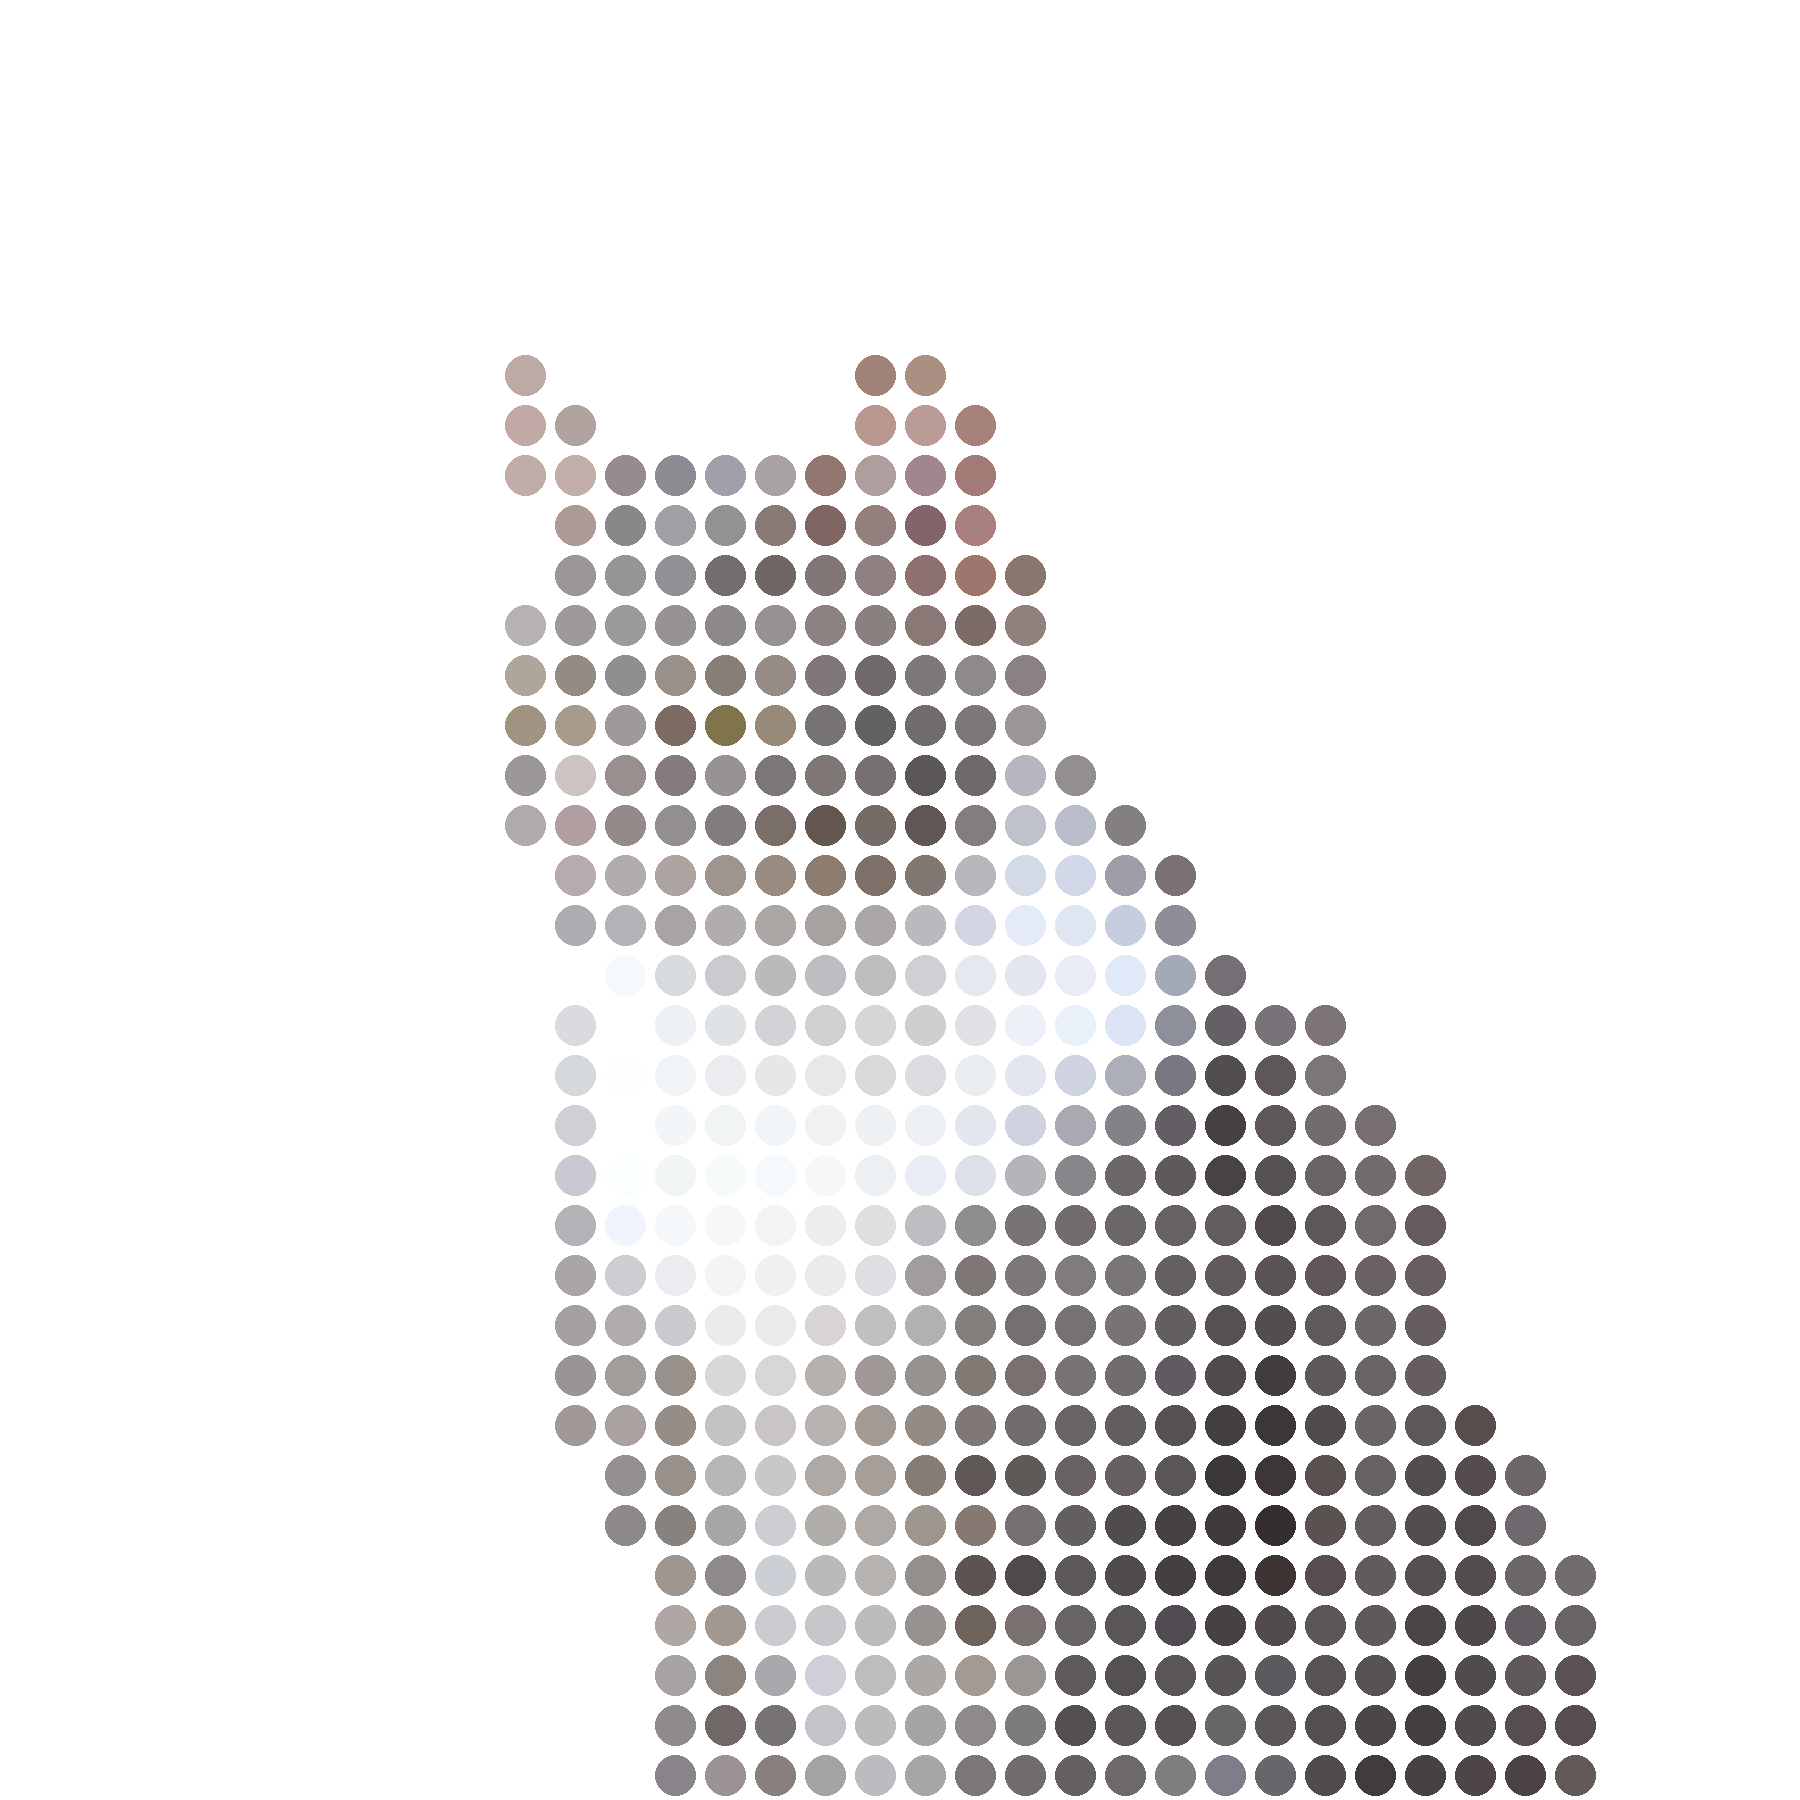

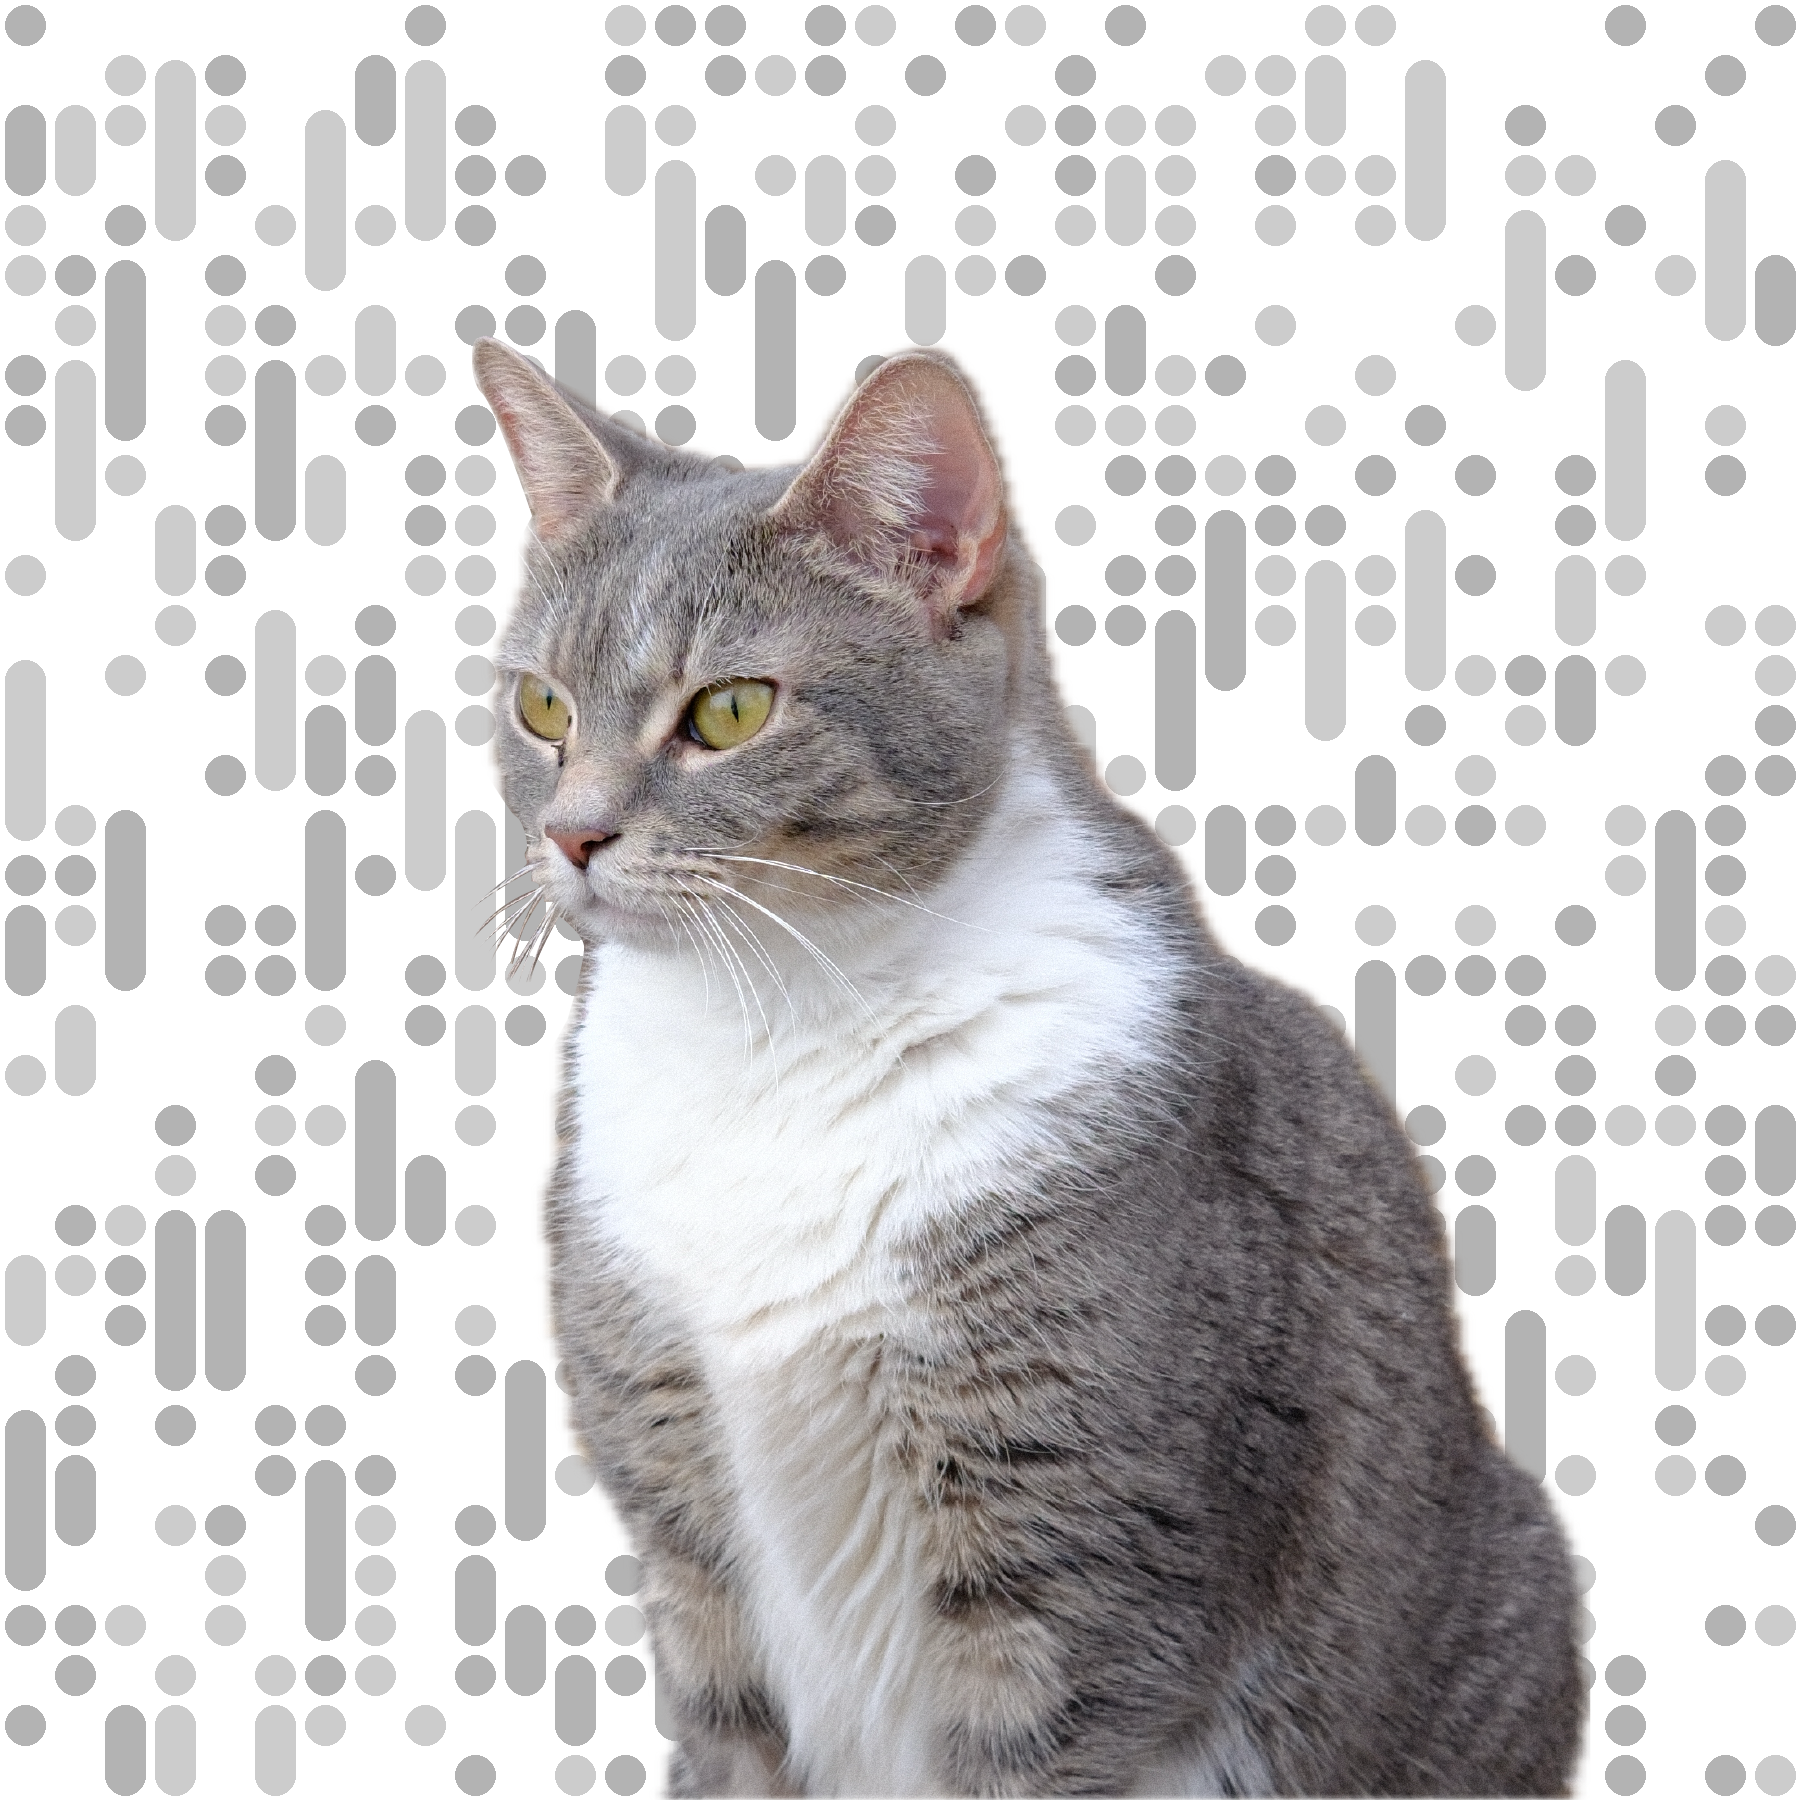

In [16]:
display_images(head_img, combined_img)

## Save it

In [ ]:
head_path = "/content/drive/MyDrive/Image Processing/output_dotted_head.png"
combined_path = "/content/drive/MyDrive/Image Processing/output_revealed.png"
save_images(head_path, combined_path)

✅ Output Saved:
• Dotted Portrait: /content/drive/MyDrive/Image Processing/output_dotted_head.png
• Combined Image: /content/drive/MyDrive/Image Processing/output_combined_clean.png
